# SPRINT 2 - Model Building

Task - Data Preparation and Model Building

* Problem Statement - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

Why predict medical cost? (Business Impact)
Managing and predicting medical costs for policyholders can be complex, and inaccurate estimations may lead to financial challenges for the insurance company. If we can predict medical cost using a ML model, we can easily determine appropriate premium pricing that reflects the actual risk and cost associated with each policyholder is critical for competitiveness and profitability. ML models can help in setting dynamic and personalized premium prices, aligning them with individual risk profiles, and ensuring fairness and competitiveness in the market.

Steps to be followed
* Step - 1: Load the data and perform the basic EDA to understand the data.
* Step - 2: Document the below mentioned points properly: 
    - Identify the input and output/target variables. 
    - Identify the type of ML Task.
    - Identify the Evaluation Metric.
    	- For regression task - Mean Absolute Error
    	- For classification task - Accuracy
* Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).
* Step - 4: Data preparation on train data:
    - For Numerical Variables - Standardization or Normalization (Fit and Transform)
    - For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
* Step - 5: Data preparation on test data:
    -   For Numerical Variables - Standardization (Transform)
    - For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
* Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
    - KNN
    - Logistic Regression / Linear Regression
    - Support Vector Machines
    - Decision Trees
    - Random Forest
* Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 
* Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer


#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
X = df.drop(columns=['charges'])
y = df['charges']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=95)

#### x_train

In [10]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_num = x_train.select_dtypes(include=['int64','float64'])

In [11]:
x_train_cat.dtypes

sex       object
smoker    object
region    object
dtype: object

In [12]:
x_train_cat['sex'] = x_train_cat['sex'].map({'male':1,'female':0})
x_train_cat['smoker'] = x_train_cat['smoker'].map({'yes':1,'no':0})

In [13]:
x_train_cat = pd.get_dummies(x_train_cat, columns=['region']).astype(int)

In [14]:
std_scaler = StandardScaler()
x_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(x_train_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=x_train.index)

In [15]:
x_train_num_transformed

,age,bmi,children
658,0.623735,0.845860,-0.069770
1228,1.187725,0.602803,-0.893053
327,0.412239,0.939470,0.753514
916,0.271241,-0.636298,-0.893053
477,-0.997737,0.799055,-0.893053
...,...,...,...
353,-0.433747,0.736649,-0.893053
343,1.681217,0.986275,-0.893053
773,-1.420730,-0.308663,-0.893053
118,0.694234,-0.589493,-0.893053


In [16]:
x_train_cat.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
658,0,0,1,0,0,0
1228,1,0,0,0,1,0
327,1,1,0,1,0,0
916,0,1,0,1,0,0
477,1,0,0,1,0,0


In [17]:
x_train_transformed = pd.concat([x_train_cat,x_train_num_transformed],axis=1)

In [18]:
x_train_transformed.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
658,0,0,1,0,0,0,0.623735,0.845860,-0.069770
1228,1,0,0,0,1,0,1.187725,0.602803,-0.893053
327,1,1,0,1,0,0,0.412239,0.939470,0.753514
916,0,1,0,1,0,0,0.271241,-0.636298,-0.893053
477,1,0,0,1,0,0,-0.997737,0.799055,-0.893053


#### x_test

In [20]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_num = x_test.select_dtypes(include=['int64','float64'])

In [21]:
x_test_cat.dtypes

sex       object
smoker    object
region    object
dtype: object

In [22]:
x_test_cat['sex'] = x_test_cat['sex'].map({'male':1,'female':0})
x_test_cat['smoker'] = x_test_cat['smoker'].map({'yes':1,'no':0})

In [23]:
x_test_cat = pd.get_dummies(x_test_cat, columns=['region']).astype(int)

In [24]:
x_test_num_transformed = pd.DataFrame(std_scaler.transform(x_test_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=x_test.index)

In [25]:
x_test_transformed = pd.concat([x_test_cat,x_test_num_transformed],axis=1)

### Training Models

### 1 - KNN Regressor

In [28]:
knn = KNeighborsRegressor()
knn.fit(x_train_transformed,y_train)

KNeighborsRegressor()

In [29]:
knn_predict = knn.predict(x_test_transformed)

In [30]:
knn.score(x_train_transformed,y_train)

0.7711836331853981

In [31]:
r2_score(y_test,knn_predict)

0.6503941395478172

### 2 - Decision_Tree_Regressor

In [33]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_transformed,y_train)

DecisionTreeRegressor()

In [34]:
dtr_predict = dtr.predict(x_test_transformed)

In [35]:
dtr.score(x_train_transformed,y_train)

0.999476090361156

In [36]:
r2_score(y_test,dtr_predict)

0.7394593480691807

### 3 - Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [39]:
lr_prd = lr.predict(x_test_transformed)

In [40]:
lr.score(x_train_transformed,y_train)

0.7502694887687831

In [41]:
r2_score(y_test,lr_prd)

0.7499862523398035

### 4 - SVM

In [43]:
svr = SVR()
svr.fit(x_train_transformed,y_train)

SVR()

In [44]:
sv_prd = svr.predict(x_test_transformed)

In [45]:
svr.score(x_train_transformed,y_train)

-0.09843845315067723

In [46]:
r2_score(y_test,sv_prd)

-0.11276708139562985

### 5 - Random Forest

In [48]:
rdf = RandomForestRegressor()
rdf.fit(x_train_transformed,y_train)

RandomForestRegressor()

In [49]:
rdf_prd = rdf.predict(x_test_transformed)

In [50]:
rdf.score(x_train_transformed,y_train)

0.9753134170382193

In [51]:
r2_score(y_test,rdf_prd)

0.8599173912963782

In [52]:
mean_squared_error(y_test,rdf_prd)

19620689.90436707

In [53]:
root_mean_squared_error(y_test,rdf_prd)

4429.524794418367

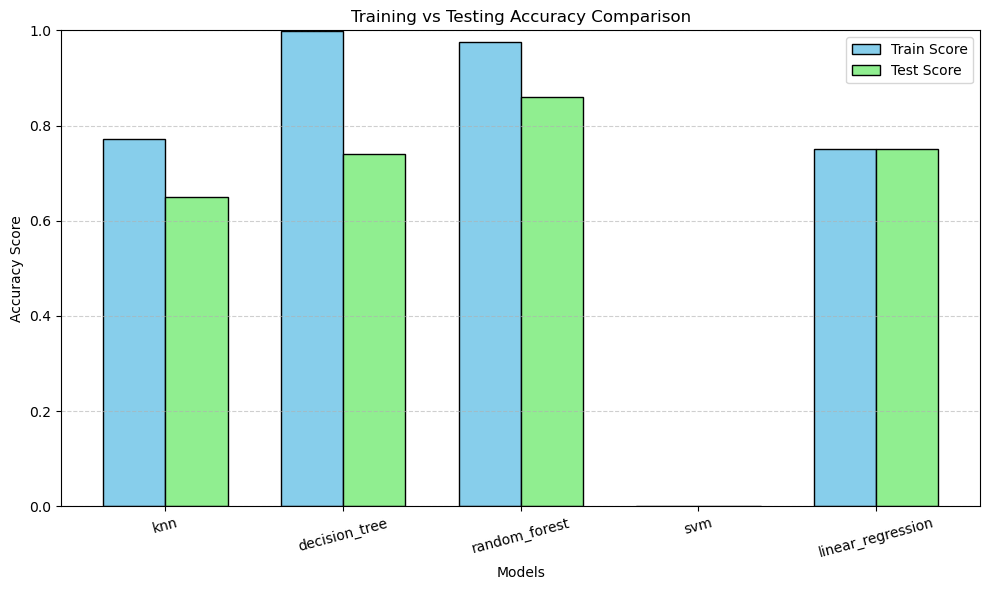

In [54]:
scores = {
     'knn': knn,
     'decision_tree': dtr,
     'random_forest': rdf,
     'svm': svr,
     'linear_regression': lr,
      }

# Get model names
model_names = list(scores.keys())

# Collect training and testing scores
train_scores = [scores[m].score(x_train_transformed, y_train) for m in model_names]
test_scores  = [scores[m].score(x_test_transformed, y_test) for m in model_names]

# Plot
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_scores, width, label='Train Score', color='skyblue', edgecolor='black')
plt.bar(x + width/2, test_scores, width, label='Test Score', color='lightgreen', edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Training vs Testing Accuracy Comparison')
plt.xticks(x, model_names, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Hyperparameter Tuning

##### 1)KNN Tuning

In [57]:
param_grid = {'algorithm' : ['kd_tree', 'brute'],
               'leaf_size' : [3,5,6,7,8],
               'n_neighbors' : [2,3,5,7,9,11,13]
             }

In [58]:
grd_knn = GridSearchCV(estimator=knn,param_grid=param_grid)

In [59]:
grd_knn.fit(x_train_transformed,y_train)

  File "C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 13]})

In [60]:
grd_knn.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [61]:
grd_knn.best_score_

0.6216044991832028

In [62]:
knn1 = KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)
knn1.fit(x_train_transformed,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [63]:
knn1_prd = knn1.predict(x_test_transformed)

In [64]:
r2_score(y_test,knn1_prd) #After Tuning

0.6790821461545878

In [65]:
r2_score(y_test,knn_predict) #Before Tuning

0.6503941395478172

#### Decision Tree Tuning

In [67]:
grid_param = {
    'criterion': ['absolute_error', 'poisson', 'friedman_mse', 'squared_error'],
    'max_depth' : range(3,12,2),
    'min_samples_leaf' : range(3,10,2),
    'min_samples_split': range(4,10,2)    
}

In [68]:
grd_dt = GridSearchCV(param_grid=grid_param,
                      estimator=dtr,
                      cv=5)

In [69]:
grd_dt.fit(x_train_transformed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson',
                                       'friedman_mse', 'squared_error'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [70]:
grd_dt.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=7, min_samples_split=4)

In [71]:
dtr1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=5,min_samples_leaf=7, min_samples_split=4)

In [72]:
dtr1.fit(x_train_transformed,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=7, min_samples_split=4)

In [73]:
dtr1.score(x_train_transformed,y_train)

0.856197638554463

In [74]:
dtr1_prd = dtr1.predict(x_test_transformed)

In [75]:
r2_score(y_test,dtr1_prd) # After Tuning

0.8734625154773942

In [76]:
r2_score(y_test,dtr_predict) # Before Tuning

0.7394593480691807

#### Linear Regression Tuning

##### L1 Regularization

In [153]:
x_train_transformed.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
658,0,0,1,0,0,0,0.623735,0.845860,-0.069770
1228,1,0,0,0,1,0,1.187725,0.602803,-0.893053
327,1,1,0,1,0,0,0.412239,0.939470,0.753514
916,0,1,0,1,0,0,0.271241,-0.636298,-0.893053
477,1,0,0,1,0,0,-0.997737,0.799055,-0.893053


In [169]:
lasscv = LassoCV(alphas=np.arange(0.001,0.1,0.01),max_iter=10)
lasscv.fit(x_train_transformed,y_train)

LassoCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        max_iter=10)

In [171]:
lasscv.alpha_

0.09099999999999998

In [173]:
alpha = lasscv.alpha_
alpha

0.09099999999999998

In [177]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train_transformed,y_train)

Lasso(alpha=0.09099999999999998)

In [179]:
lasso_reg.score(x_test_transformed,y_test)

0.7498875488642105

##### L2 Regularization

In [182]:
ridge = RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridge.fit(x_train_transformed,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [184]:
ridge.alpha_

0.09099999999999998

In [188]:
ridge_model = Ridge(alpha=ridge.alpha_)
ridge_model.fit(x_train_transformed,y_train)

Ridge(alpha=0.09099999999999998)

In [190]:
ridge_model.score(x_test_transformed,y_test)

0.7498773980441131

In [192]:
r2_score(y_test,lr_prd)

0.7499862523398035

### SVM Tuning

In [213]:
param_grid = { 'C' : [1,5,10,20,25,30,35,40,45,50,55,58,60,65,70,90],
               'gamma' : [0.001,0.01,0.02,0.002]
              }

In [215]:
gridsearch = GridSearchCV(svr, param_grid)

gridsearch.fit(x_train_transformed,y_train)

# best parms
gridsearch.best_params_

{'C': 90, 'gamma': 0.02}

In [221]:
svr1 = SVR (C = 90, gamma =0.02)
svr1.fit(x_train_transformed,y_train)

SVR(C=90, gamma=0.02)

In [223]:
svr1.score(x_train_transformed,y_train)

-0.049733770874816896

In [225]:
sv_prd1 = svr1.predict(x_test_transformed)

In [227]:
r2_score(y_test,sv_prd1)

-0.09642248101115003

### Random Forest Tuning

In [230]:
params = {'n_estimators':[13,14],
         'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
         'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(estimator=rdf,param_grid=params)
grd.fit(x_train_transformed,y_train)

print ('best_params = > ', grd.best_params_)

best_params = >  {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 14}


In [232]:
grd.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=14)

In [238]:
rdf1 = RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=14)

In [240]:
rdf1.fit(x_train_transformed,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=14)

In [242]:
rdf1_prd = rdf1.predict(x_test_transformed)

In [248]:
r2_score(y_test,rdf1_prd) #After Tuning

0.8771400929864152

In [250]:
r2_score(y_test,rdf_prd)

0.8599173912963782

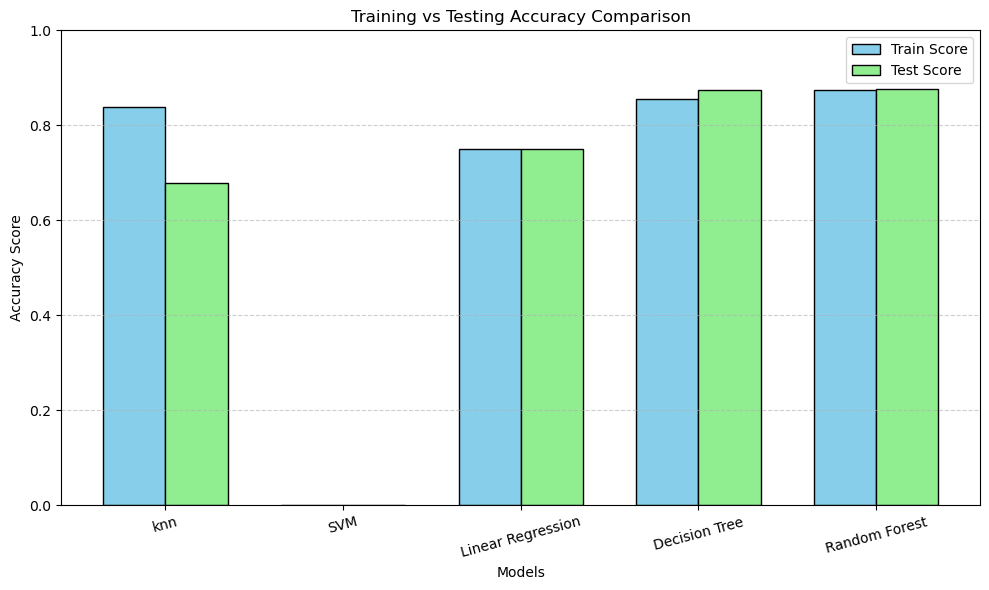

In [268]:
scores = {
     'knn' : KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3),
    'SVM':SVR (C = 90, gamma =0.02),
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(criterion='absolute_error', max_depth=5,min_samples_leaf=7, min_samples_split=4),
    'Random Forest':RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=14)
      }
train_scores = []
test_scores = []

# Fit and calculate R² scores
for name, model in scores.items():
    model.fit(x_train_transformed, y_train)
    train_scores.append(model.score(x_train_transformed, y_train))
    test_scores.append(model.score(x_test_transformed, y_test))
# Get model names
model_names = list(scores.keys())

# Collect training and testing scores
train_scores = [scores[m].score(x_train_transformed, y_train) for m in model_names]
test_scores  = [scores[m].score(x_test_transformed, y_test) for m in model_names]

# Plot
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_scores, width, label='Train Score', color='skyblue', edgecolor='black')
plt.bar(x + width/2, test_scores, width, label='Test Score', color='lightgreen', edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Training vs Testing Accuracy Comparison')
plt.xticks(x, model_names, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Pipeline

In [271]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline